In [2]:
import pandas as pd

df=pd.read_csv('rfqs.csv')
df

,Unnamed: 0,DateTime,instrument,client,price,mid,vol(MM),dv01,num_dealers,side,won
0,94075,2019-01-25 15:58:29.0,I,F,112.779,112.7416,2.000,6.0870,5,-1,0
1,94087,2019-01-28 09:28:10.0,B,G,106.065,106.1855,0.500,21.9017,5,1,0
2,94089,2019-01-28 09:40:24.0,F,G,107.607,107.5570,0.975,13.2621,5,-1,0
3,94158,2019-01-29 16:21:06.0,E,F,100.622,100.5820,0.010,4.4853,5,-1,0
4,94194,2019-01-30 16:19:28.0,F,F,107.297,107.2170,0.448,13.2087,5,-1,0
...,...,...,...,...,...,...,...,...,...,...,...
6398,397813,2019-07-31 08:27:39.0,K,B,128.835,128.8701,0.005,7.0343,5,1,0
6399,397824,2019-07-31 15:14:18.0,C,B,111.673,111.6428,0.047,10.2421,5,-1,0
6400,397825,2019-07-31 15:17:39.0,J,B,117.188,117.1953,0.117,11.7868,5,1,0
6401,397848,2019-07-31 07:50:10.0,H,A,113.353,113.3045,2.500,7.2674,5,-1,1


rfqs.csv:

date_time: date and time at which the quote is requested.
Instrument: the bond for which the customer has requested a price
client: client code (anonymized)
price: price quoted to the client by the bank
mid: market mid-price of the bond captured by the bank's system at the time of the operation. Typically based on information provided by the platform.
vol_MM: amount requested by the client (in millions of euros).
dv01: sensitivity of the bond to variations in its yield (a measure of risk of the bond)
num_dealers: number of banks from whom the client has requested a quote
side: 1 if it is a buy -1 if it is a sell (from the point of view of the bank, not the client)
won: 0 if the bank did not close the operation, 1 if it did.


In [3]:
df['spread'] = df['price'] - df['mid']
df

,Unnamed: 0,DateTime,instrument,client,price,mid,vol(MM),dv01,num_dealers,side,won,spread
0,94075,2019-01-25 15:58:29.0,I,F,112.779,112.7416,2.000,6.0870,5,-1,0,0.0374
1,94087,2019-01-28 09:28:10.0,B,G,106.065,106.1855,0.500,21.9017,5,1,0,-0.1205
2,94089,2019-01-28 09:40:24.0,F,G,107.607,107.5570,0.975,13.2621,5,-1,0,0.0500
3,94158,2019-01-29 16:21:06.0,E,F,100.622,100.5820,0.010,4.4853,5,-1,0,0.0400
4,94194,2019-01-30 16:19:28.0,F,F,107.297,107.2170,0.448,13.2087,5,-1,0,0.0800
...,...,...,...,...,...,...,...,...,...,...,...,...
6398,397813,2019-07-31 08:27:39.0,K,B,128.835,128.8701,0.005,7.0343,5,1,0,-0.0351
6399,397824,2019-07-31 15:14:18.0,C,B,111.673,111.6428,0.047,10.2421,5,-1,0,0.0302
6400,397825,2019-07-31 15:17:39.0,J,B,117.188,117.1953,0.117,11.7868,5,1,0,-0.0073
6401,397848,2019-07-31 07:50:10.0,H,A,113.353,113.3045,2.500,7.2674,5,-1,1,0.0485


In [8]:
df.instrument.value_counts()

instrument
B    837
C    718
D    657
A    644
F    545
E    516
J    449
I    442
H    432
G    428
L    384
K    351
Name: count, dtype: int64

In [10]:
df['DateTime'] = pd.to_datetime(df['DateTime'])


In [12]:
df=df.sort_values(by=['DateTime'])
df

,Unnamed: 0,DateTime,instrument,client,price,mid,vol(MM),dv01,num_dealers,side,won,spread
4574,360457,2019-01-25 08:03:15,A,A,101.503,101.4839,4.590,8.9921,15,-1,0,0.0191
4572,360448,2019-01-25 09:06:34,E,A,100.688,100.6939,13.100,4.4970,5,1,0,-0.0059
5835,386692,2019-01-25 09:08:31,B,A,106.481,106.5434,2.700,22.0010,5,1,1,-0.0624
5836,386693,2019-01-25 09:11:51,A,A,101.730,101.6640,5.000,9.0104,5,-1,0,0.0660
1613,273903,2019-01-25 09:54:06,C,B,101.050,101.0458,15.000,9.5731,5,-1,1,0.0042
...,...,...,...,...,...,...,...,...,...,...,...,...
3569,334893,2019-10-29 15:20:46,B,A,137.254,137.3053,2.228,31.1414,2,1,0,-0.0513
5634,382721,2019-10-29 15:55:58,K,B,127.119,127.1446,0.048,6.8256,10,1,0,-0.0256
6072,391457,2019-10-29 16:01:14,C,B,111.169,111.1486,0.200,10.1967,10,-1,0,0.0204
2368,300459,2019-10-29 16:14:49,J,B,116.874,116.8942,3.000,11.5127,10,1,0,-0.0202


In [16]:
df.won.value_counts()

won
0    5680
1     723
Name: count, dtype: int64

In [17]:
df.client.value_counts()

client
A    3146
B    1834
C     394
D     391
G     336
F     302
Name: count, dtype: int64

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, classification_report
from sklearn.calibration import calibration_curve


# Feature Engineering
df['spread'] = df['price'] - df['mid']
df['instrument'] = df['instrument'].astype('category')
df['client'] = df['client'].astype('category')

features = ['spread', 'vol(MM)', 'dv01', 'num_dealers', 'side', 'instrument', 'client']
target = 'won'

# Time split
split_date = pd.to_datetime('2019-09-01')
train_df = df[df['DateTime'] < split_date]
test_df = df[df['DateTime'] >= split_date]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Print basic info
print(f"Train samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")


Train samples: 5223
Test samples: 1180


In [60]:
# Column separation
numeric_features = ['spread', 'vol(MM)', 'dv01', 'num_dealers', 'side']
categorical_features = ['instrument', 'client']

# Preprocessor: scaling numerics, encoding categoricals
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


In [82]:
import lightgbm as lgb

# Prepare LightGBM datasets
lgb_features = ['spread', 'vol(MM)', 'dv01', 'num_dealers', 'side', 'instrument', 'client']

X_train_lgb = X_train[lgb_features]
X_test_lgb = X_test[lgb_features]

# LightGBM classifier with native categorical handling
lgbm_model = LGBMClassifier(
    objective='binary',
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=500,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    monotone_constraints=[-1, 0, 0, 0, 0, 0, 0],  # spread constraint
    random_state=42
)

lgbm_model.fit(
    X_train_lgb,
    y_train,
    categorical_feature=['instrument', 'client'],
    eval_set=[(X_test_lgb, y_test)],
    eval_metric='auc',
)


[LightGBM] [Info] Number of positive: 576, number of negative: 4647
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 5223, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110281 -> initscore=-2.087869
[LightGBM] [Info] Start training from score -2.087869


LGBMClassifier(learning_rate=0.05, monotone_constraints=[-1, 0, 0, 0, 0, 0, 0],
               n_estimators=500, objective='binary', random_state=42,
               scale_pos_weight=8.067708333333334)

In [69]:
# Logistic Regression Pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])


# XGBoost with monotonic constraint (only spread constrained)
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        learning_rate=0.05,
        max_depth=4,
        n_estimators=500,
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        monotone_constraints="(-1,0,0,0,0,0,0)",  # Only spread must be decreasing
        use_label_encoder=False,
        random_state=42
    ))
])


In [70]:
# Fit all models
print("Training Logistic Regression...")
logreg_pipeline.fit(X_train, y_train)

print("Training LightGBM...")
lgbm_model.fit(X_train, y_train)

print("Training XGBoost...")
xgb_pipeline.fit(X_train, y_train)


Training Logistic Regression...
Training LightGBM...
[LightGBM] [Info] Number of positive: 576, number of negative: 4647
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 5223, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110281 -> initscore=-2.087869
[LightGBM] [Info] Start training from score -2.087869
Training XGBoost...


/Users/omar/anaconda3/envs/mt5_env/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:41:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['spread', 'vol(MM)', 'dv01',
                                                   'num_dealers', 'side']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['instrument', 'client'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints='(-1,0,0,0,0,0,0)',
                               multi_strategy=None, n_estimators=500,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [64]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    brier = brier_score_loss(y_test, y_pred_proba)

    print(f"\n🔵 {model_name}")
    print(f"ROC AUC: {auc:.4f}")
    print(f"Brier Score: {brier:.4f}")
    print(classification_report(y_test, (y_pred_proba > 0.5).astype(int)))
    
    # Calibration curve
    prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)

    plt.plot(prob_pred, prob_true, marker='o', label=model_name)



🔵 Logistic Regression
ROC AUC: 0.6411
Brier Score: 0.2536
              precision    recall  f1-score   support

           0       0.93      0.48      0.64      1033
           1       0.17      0.74      0.28       147

    accuracy                           0.52      1180
   macro avg       0.55      0.61      0.46      1180
weighted avg       0.83      0.52      0.59      1180


🔵 LightGBM
ROC AUC: 0.6483
Brier Score: 0.1528
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1033
           1       0.20      0.27      0.23       147

    accuracy                           0.78      1180
   macro avg       0.55      0.56      0.55      1180
weighted avg       0.80      0.78      0.79      1180


🔵 XGBoost
ROC AUC: 0.6518
Brier Score: 0.1739
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1033
           1       0.19      0.41      0.26       147

    accuracy                

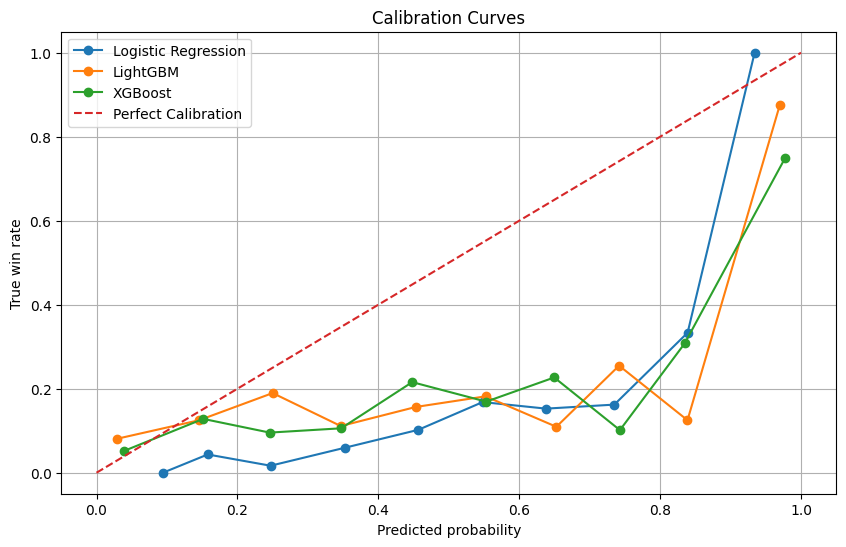

In [83]:
plt.figure(figsize=(10, 6))

evaluate_model(logreg_pipeline, X_test, y_test, "Logistic Regression")
evaluate_model(lgbm_model, X_test, y_test, "LightGBM")
evaluate_model(xgb_pipeline, X_test, y_test, "XGBoost")

# Plot ideal calibration line
plt.plot([0,1], [0,1], linestyle='--', label='Perfect Calibration')
plt.xlabel('Predicted probability')
plt.ylabel('True win rate')
plt.title('Calibration Curves')
plt.legend()
plt.grid()
plt.show()


In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Create spread grid
spread_grid = np.linspace(df['spread'].min(), df['spread'].max(), 100)

# Create dummy test data with fixed mean values
X_monotonic = pd.DataFrame({
    'spread': spread_grid,
    'vol(MM)': np.mean(X_train['vol(MM)']),
    'dv01': np.mean(X_train['dv01']),
    'num_dealers': np.mean(X_train['num_dealers']),
    'side': 1,
    'instrument': X_train['instrument'].iloc[0],
    'client': X_train['client'].iloc[0]
})

# ✅ Assign same categories as training set
# Ensure categorical columns match training data
X_monotonic['instrument'] = X_monotonic['instrument'].astype('category')
X_monotonic['instrument'] = X_monotonic['instrument'].cat.set_categories(X_train['instrument'].cat.categories)

X_monotonic['client'] = X_monotonic['client'].astype('category')
X_monotonic['client'] = X_monotonic['client'].cat.set_categories(X_train['client'].cat.categories)

# Predict
y_monotonic = lgbm_model.predict_proba(X_monotonic)[:, 1]

# Plot
plt.plot(spread_grid, y_monotonic)
plt.title("LightGBM: Win Probability vs Spread")
plt.xlabel("Spread")
plt.ylabel("Predicted Win Probability")
plt.grid()
plt.show()


TypeError: Categorical.set_categories() got an unexpected keyword argument 'inplace'

/var/folders/6v/qvykl7vd2yb8gqx3qb10rc5m0000gn/T/ipykernel_96481/1279444191.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('DateTime').resample('M')['won'].mean().plot()


<Axes: xlabel='DateTime'>

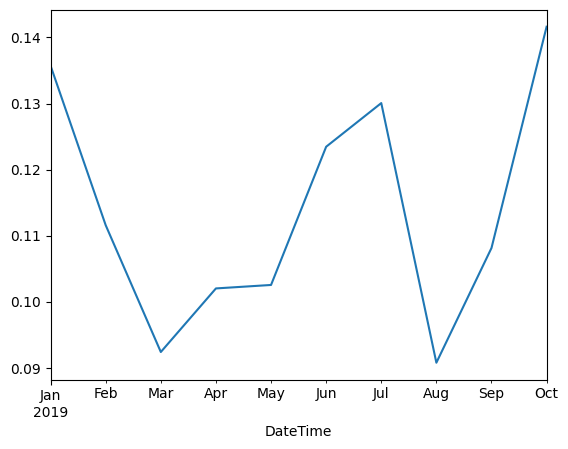

In [56]:
df.set_index('DateTime').resample('M')['won'].mean().plot()


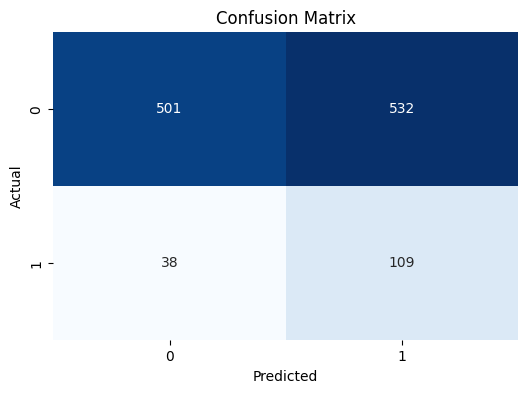


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.48      0.64      1033
           1       0.17      0.74      0.28       147

    accuracy                           0.52      1180
   macro avg       0.55      0.61      0.46      1180
weighted avg       0.83      0.52      0.59      1180



In [49]:
from sklearn.metrics import (

    confusion_matrix,
    classification_report,
)

#y_pred_proba = model.predict_proba(X_test)[:, 1]

# Predict classes
#y_pred = (y_pred_proba > 0.5).astype(int) 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


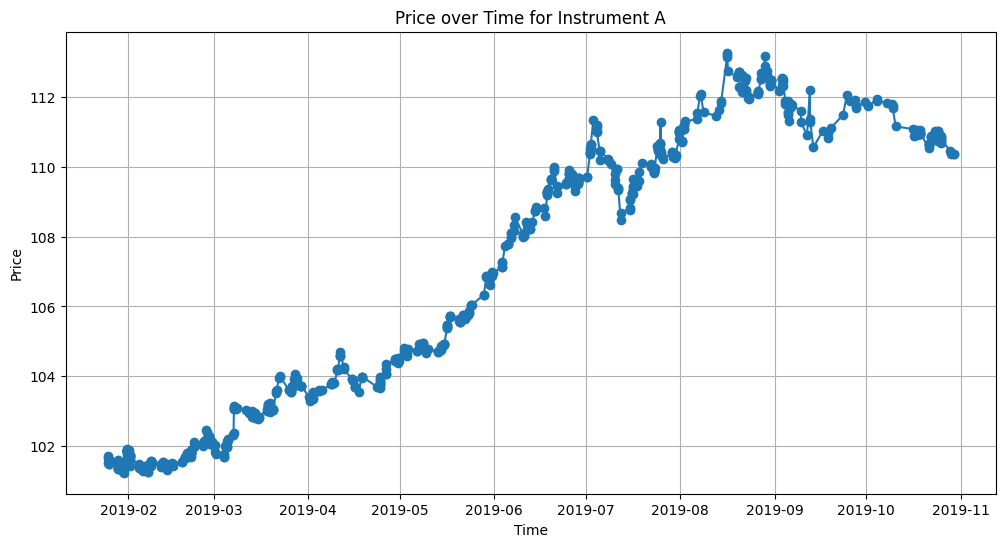

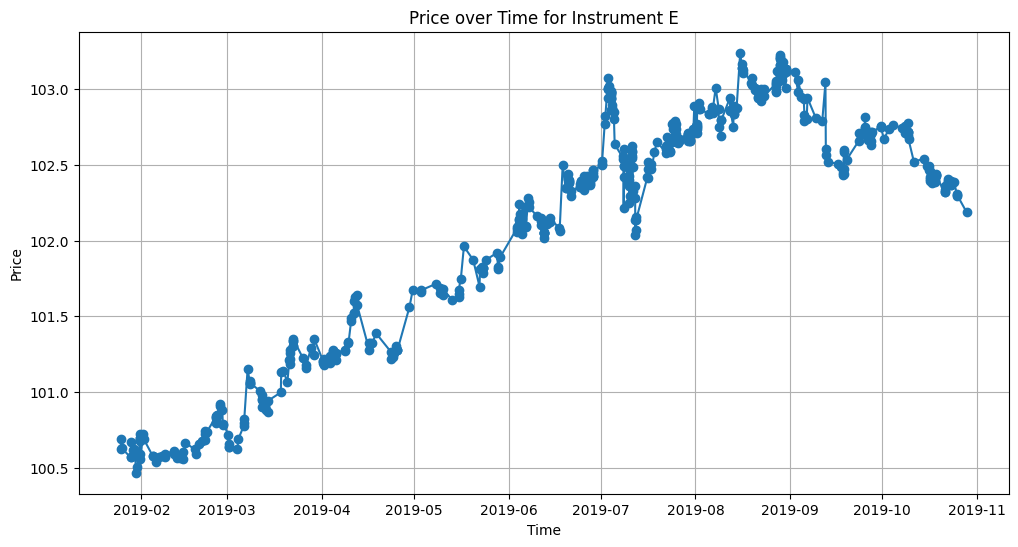

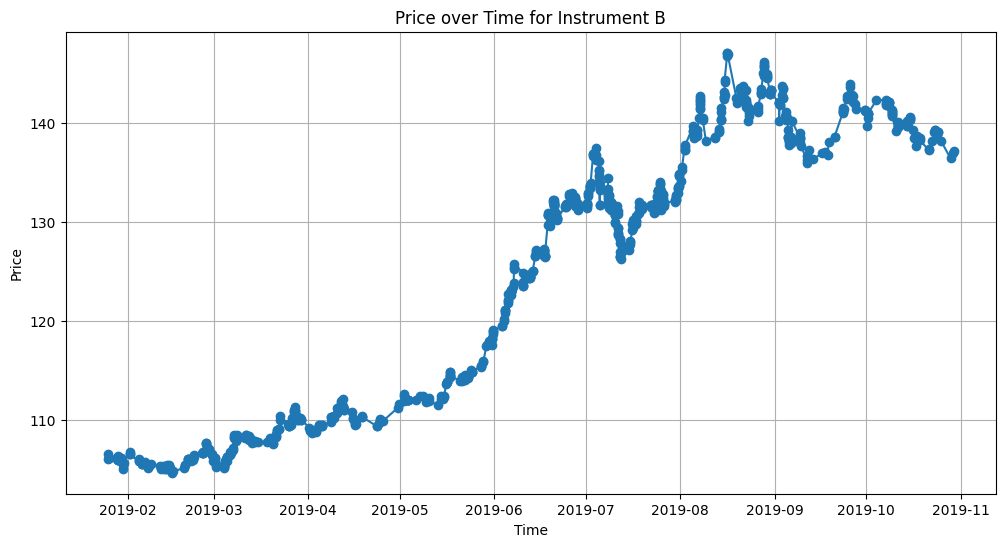

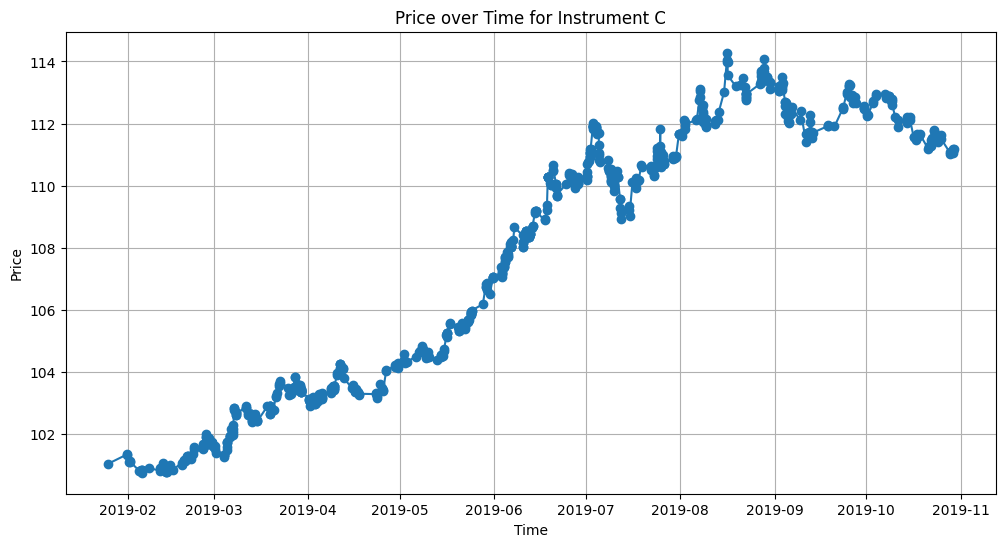

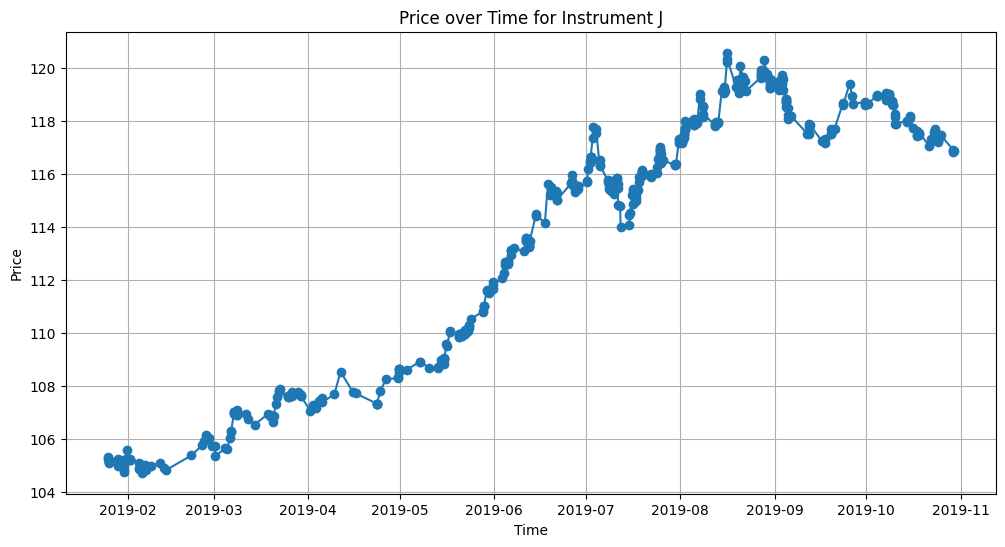

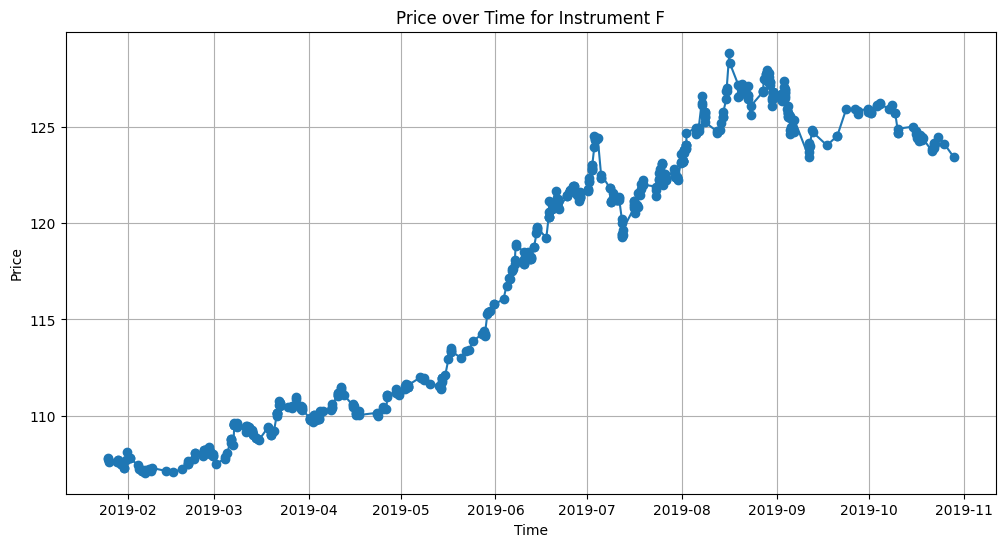

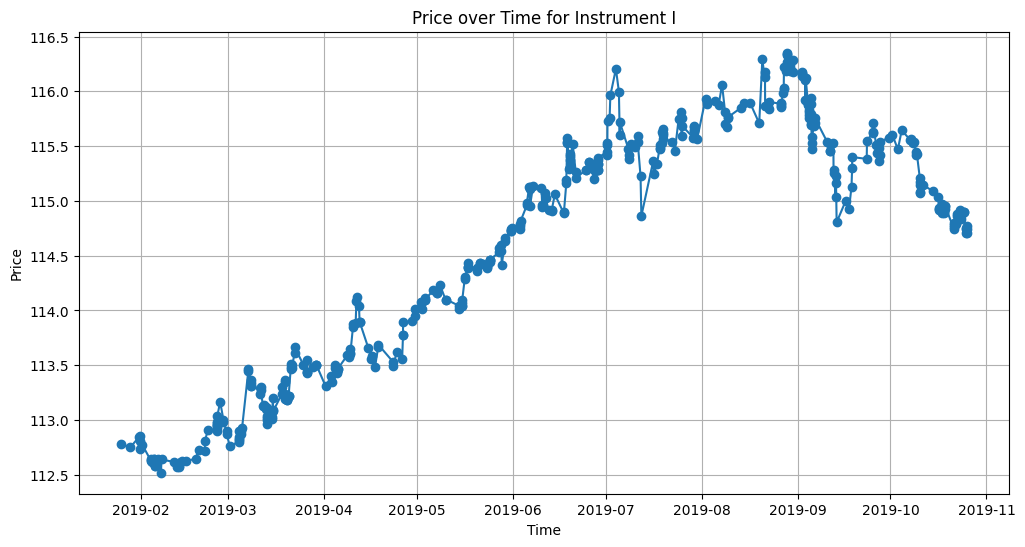

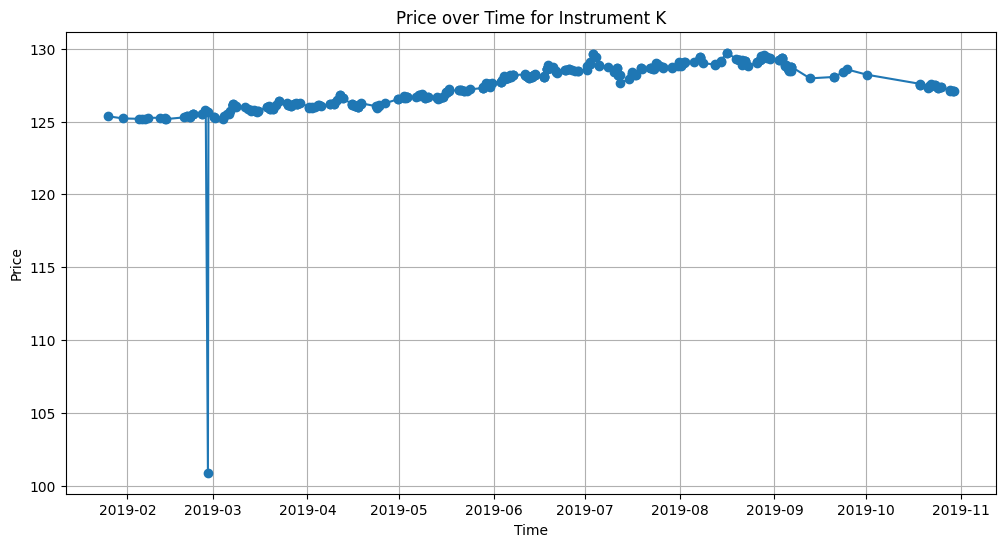

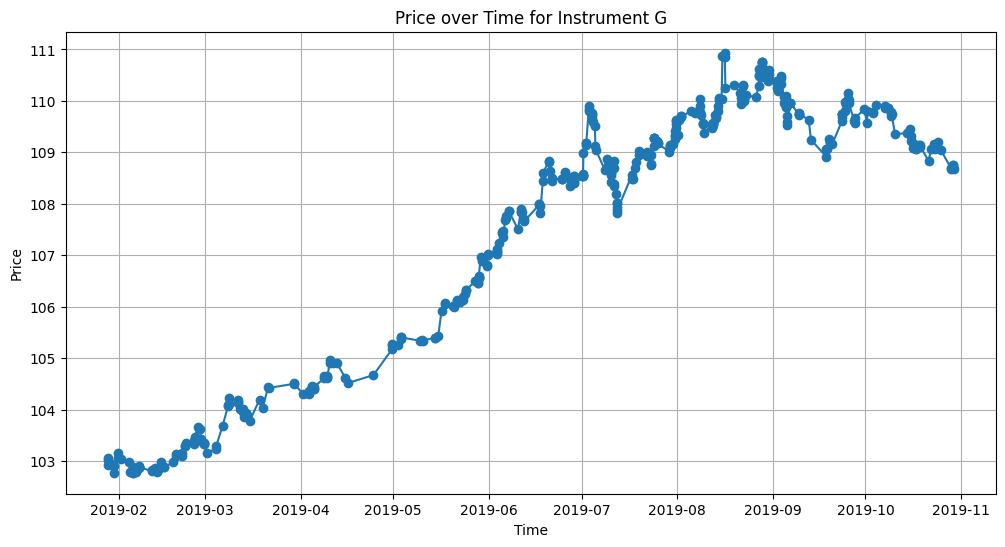

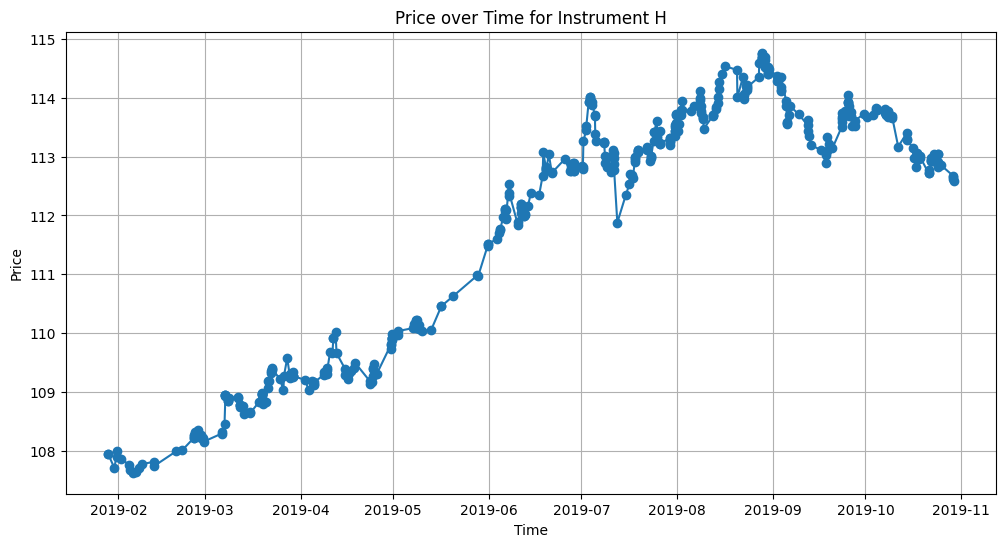

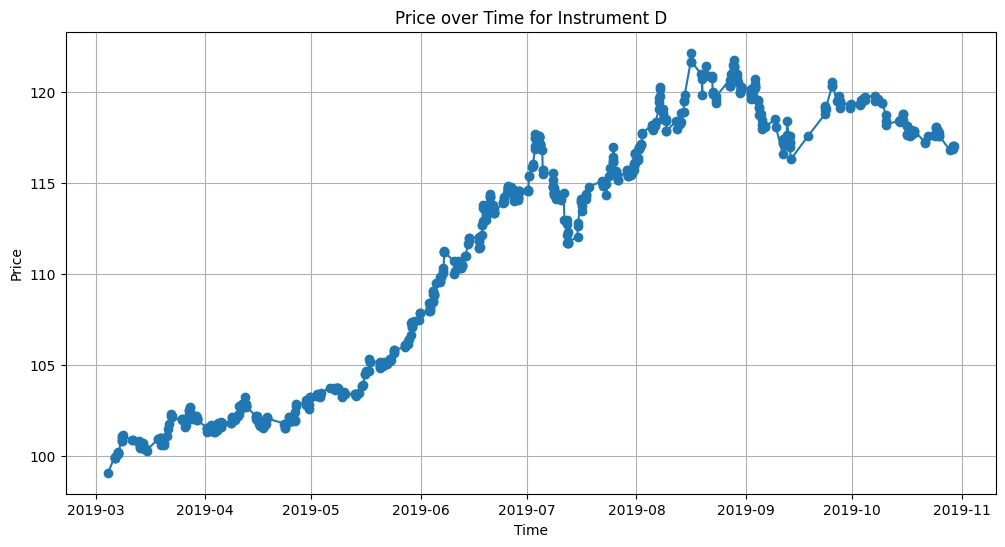

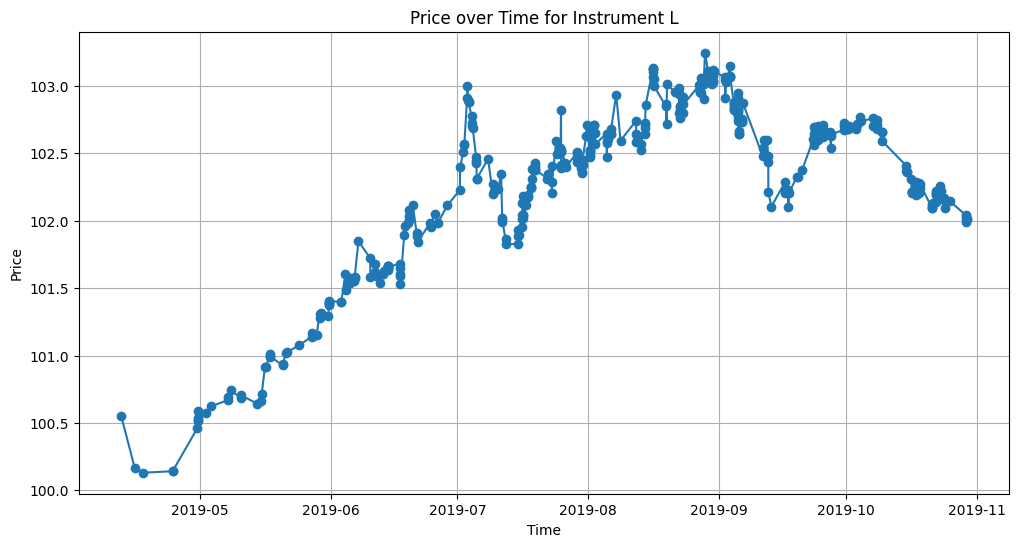

In [14]:
instruments = df['instrument'].unique()

# Set up the plot
for instr in instruments:
    subset = df[df['instrument'] == instr]
    plt.figure(figsize=(12, 6))
    plt.plot(subset['DateTime'], subset['price'], marker='o', linestyle='-')
    plt.title(f'Price over Time for Instrument {instr}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.grid()
    plt.show()

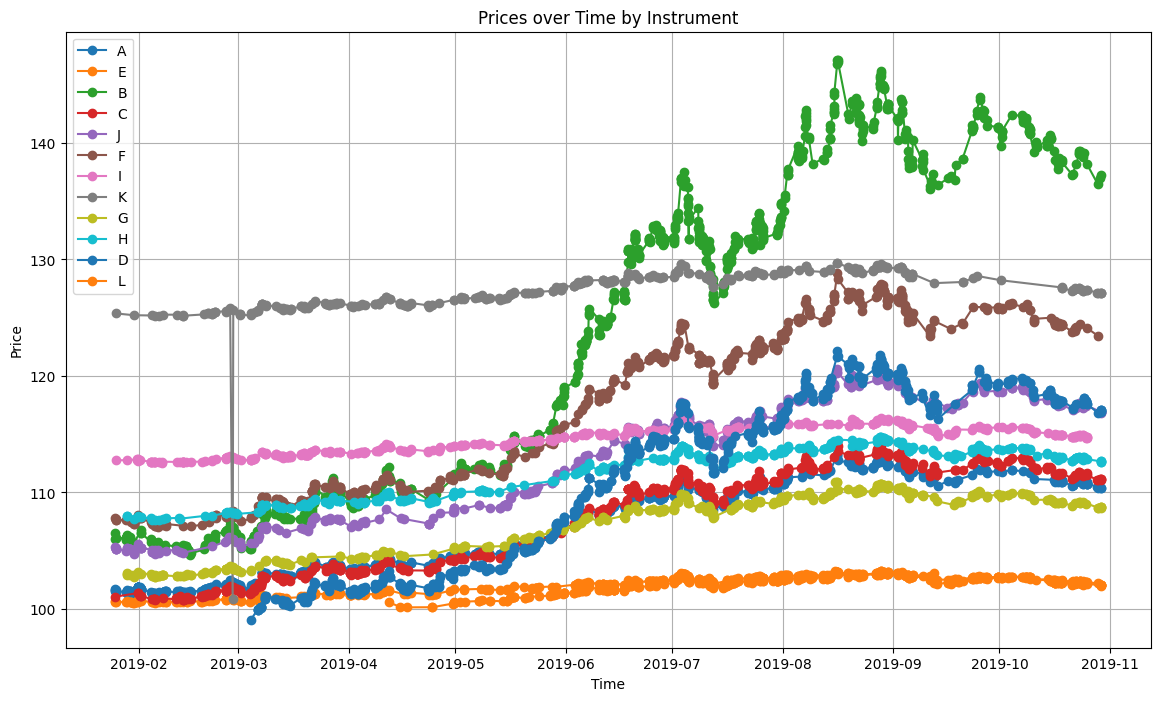

In [15]:
plt.figure(figsize=(14,8))

for instr in instruments:
    subset = df[df['instrument'] == instr]
    plt.plot(subset['DateTime'], subset['price'], marker='o', linestyle='-', label=f'{instr}')

plt.title('Prices over Time by Instrument')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


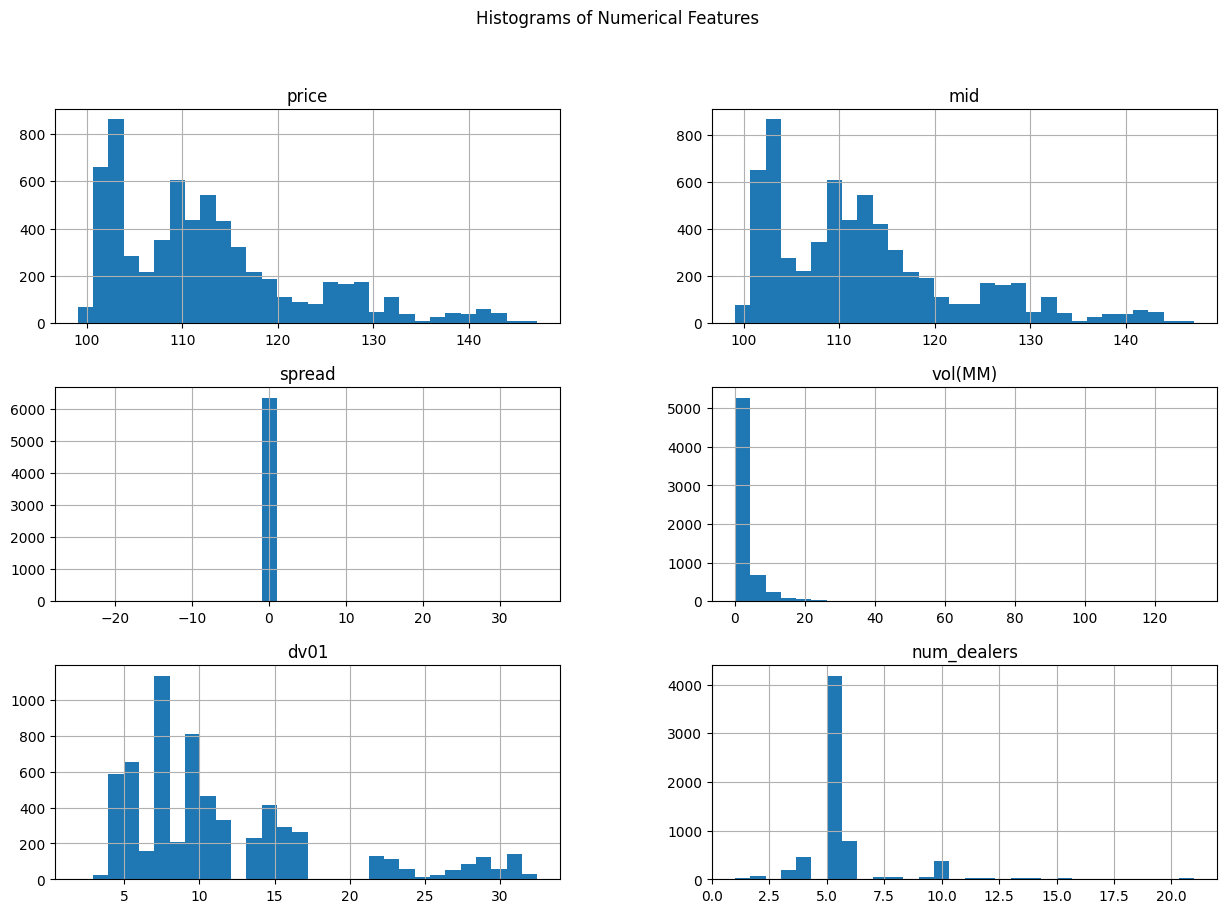

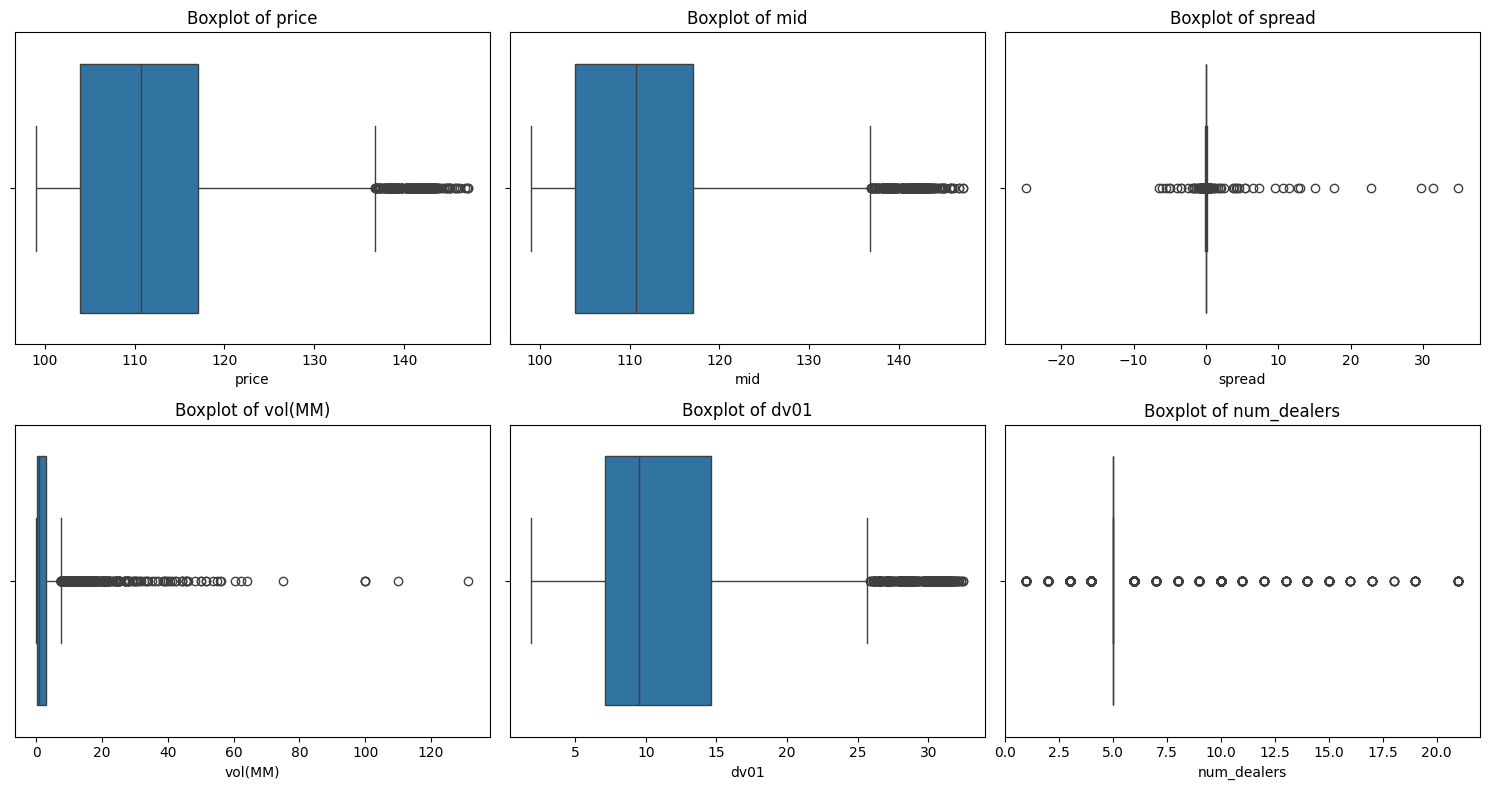

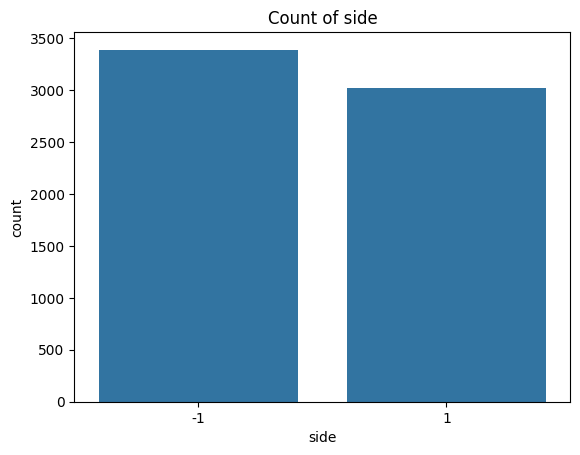

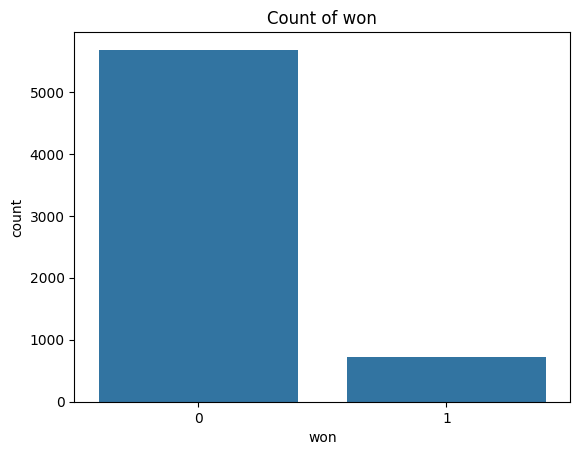

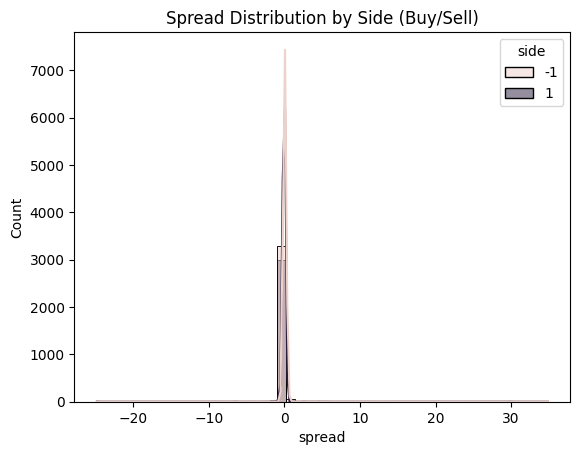

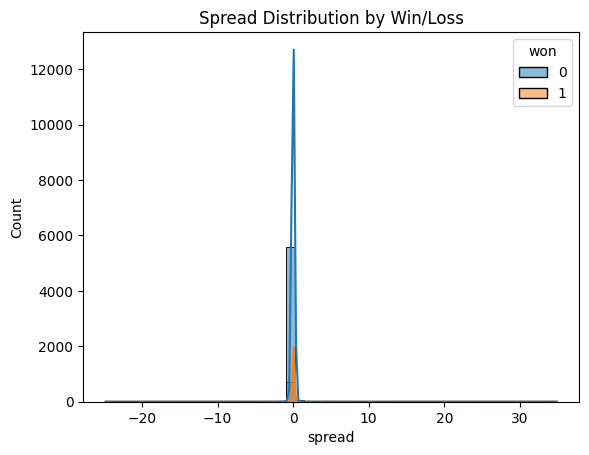

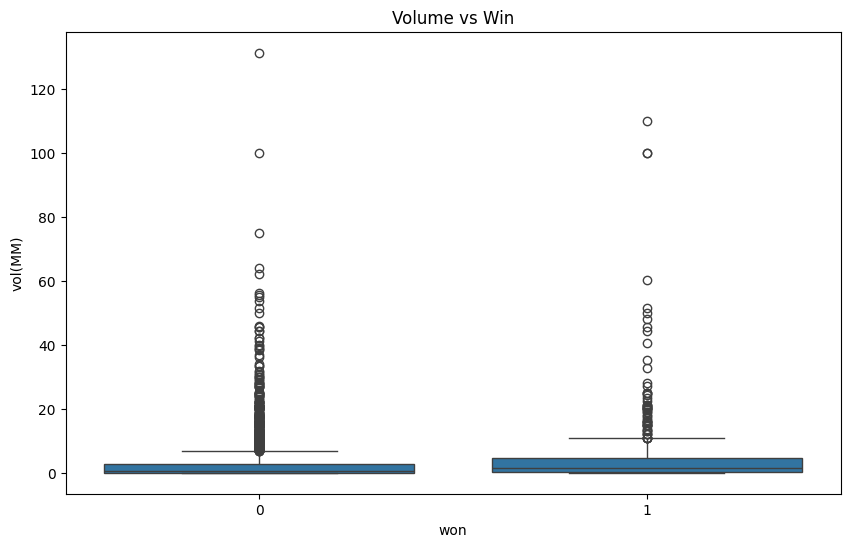

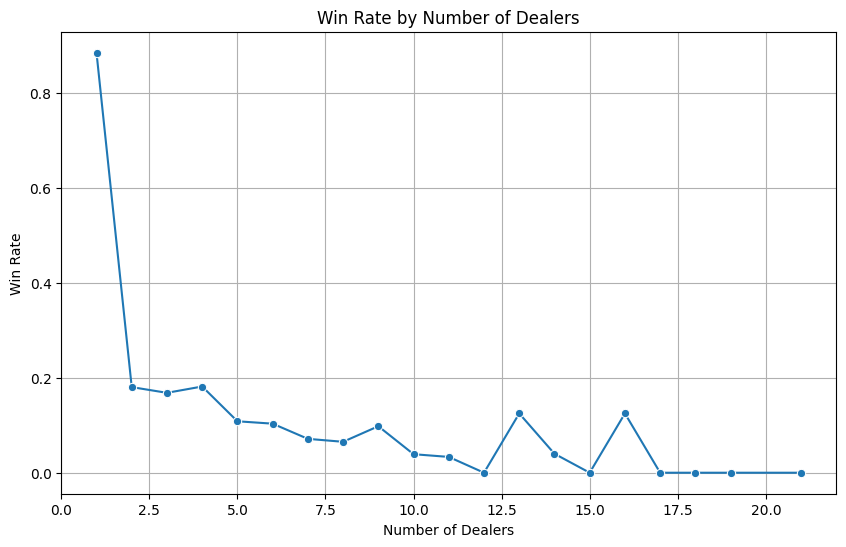

AttributeError: Can only use .dt accessor with datetimelike values

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['price', 'mid', 'spread', 'vol(MM)', 'dv01', 'num_dealers']
df[num_cols].hist(figsize=(15,10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Categorical variables
cat_cols = ['side', 'won']

for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()

# 2. Bivariate Analysis

# Spread by Side
sns.histplot(data=df, x='spread', hue='side', kde=True, bins=50)
plt.title('Spread Distribution by Side (Buy/Sell)')
plt.show()

# Spread by Won
sns.histplot(data=df, x='spread', hue='won', kde=True, bins=50)
plt.title('Spread Distribution by Win/Loss')
plt.show()

# Volume vs Won
plt.figure(figsize=(10,6))
sns.boxplot(x='won', y='vol(MM)', data=df)
plt.title('Volume vs Win')
plt.show()

# Number of dealers vs Win rate
dealer_winrate = df.groupby('num_dealers')['won'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='num_dealers', y='won', data=dealer_winrate, marker='o')
plt.title('Win Rate by Number of Dealers')
plt.xlabel('Number of Dealers')
plt.ylabel('Win Rate')
plt.grid()
plt.show()

# 3. Time Series Analysis

# RFQs per day
df['date'] = df['DateTime'].dt.date
rfqs_per_day = df.groupby('date').size()

rfqs_per_day.plot(figsize=(12,6))
plt.title('RFQs per Day')
plt.xlabel('Date')
plt.ylabel('Number of RFQs')
plt.grid()
plt.show()

# Win rate over time
daily_winrate = df.groupby('date')['won'].mean()

daily_winrate.plot(figsize=(12,6))
plt.title('Daily Win Rate')
plt.xlabel('Date')
plt.ylabel('Win Rate')
plt.grid()
plt.show()

# 4. Instrument and Client analysis

# Top instruments by volume
top_instr = df['Instrument'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_instr.values, y=top_instr.index)
plt.title('Top 10 Most Requested Instruments')
plt.xlabel('Number of RFQs')
plt.show()

# Top clients by win rate
client_winrate = df.groupby('client')['won'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=client_winrate.values, y=client_winrate.index)
plt.title('Top 10 Clients by Win Rate')
plt.xlabel('Win Rate')
plt.show()